### Author: Jesmine Ting Zi Ching (2026)
---------------------------------------------------------------------------------------------

I chose the Combined Cycle Power Plant dataset and load it into my Jupyter notebook script for this assignment because it provides real-world data on power generation efficiency, allowing for predictive modeling and feature engineering. The dataset includes key environmental and operational factors, making it ideal for regression and machine learning applications.

The dataset is available on this link: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

## 1.0 Data Collection & Understanding

In [647]:
import pandas as pd 

### 1.1 Merging Multiple Sheets from an Excel File into a Single CSV

In [648]:
# Load the Excel file with multiple sheets
file_path = "Folds5x2_pp.csv"
csv = pd.ExcelFile(file_path)

# Read all sheets into a list of DataFrames
dfs = [csv.parse(sheet_name) for sheet_name in csv.sheet_names]

# Concatenate all DataFrames into one
df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame into a single CSV file
df.to_csv("CCPP_merged.csv", index=False)

# Print confirmation message
print("\nMerged CSV file saved as 'CCPP_merged.csv'")


Merged CSV file saved as 'CCPP_merged.csv'


### 1.2 Previewing the First 5 Rows of the Dataset

In [649]:
# Display the first 5 rows of the DataFrame to check the data structure
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### 1.3 Previewing the Last 5 Rows of the Dataset

In [650]:
# Display the last 5 rows of the DataFrame to check the data structure
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,AT,V,AP,RH,PE
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93
47839,23.68,51.30,1011.86,71.24,451.67


### 1.4 Checking the Shape of the Dataset

In [651]:
# Display the total number of rows and columns in the dataset
print("\nShape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (47840, 5)


### 1.5 Displaying Column Names in the Dataset

In [652]:
# Display the names of all columns in the dataset
print("\nColumn names:")
df.columns


Column names:


Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

According to the dataset available at this link: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant acronyms stand for:

1. AT - Temperature
2. V - Exhaust Vacuum
3. AP - Ambient Pressure
4. RH - Relative Humidity
5. PE - Net hourly electrical energy output

### 1.6 Checking Data Types of Each Column

In [653]:
# Display the data type of each column in the dataset
print("\nData types of each column:")
df.dtypes


Data types of each column:


AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

### 1.7 Checking for Missing Values in the Dataset

In [654]:
# Display the number of missing values in each column
print("\nMissing values:")
df.isnull().sum()


Missing values:


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

**As shown above, there appears to be no missing values in this dataset.**

### 1.8 Displaying Dataset Information

In [655]:
# Display summary information about the dataset
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


## 2.0 Data Cleaning

### 2.1 Checking for Duplicate Rows in the Dataset

In [656]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Display the total number of rows and columns in the dataset
print("\nShape of the dataset (rows, columns):", df.shape)


Number of duplicate rows:
38313

Shape of the dataset (rows, columns): (47840, 5)


#### 2.1.1 Removing Duplicate Rows from the Dataset

In [657]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

#### 2.1.2 Verifying Duplicate Removal

In [658]:
# Check for duplicates again after cleaning
print("\nNumber of duplicate rows (after cleaning):")
print(df_cleaned.duplicated().sum())

# Display the total number of rows and columns in the dataset after cleaning
print("\nShape of the dataset after cleaning (rows, columns):")
print(df_cleaned.shape)


Number of duplicate rows (after cleaning):
0

Shape of the dataset after cleaning (rows, columns):
(9527, 5)


**As shown above, data duplication has been addressed by removing a total of 38313 duplicate rows, leaving 9527 unique rows.**

In [659]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Boxplot Visualization for Multiple Variables

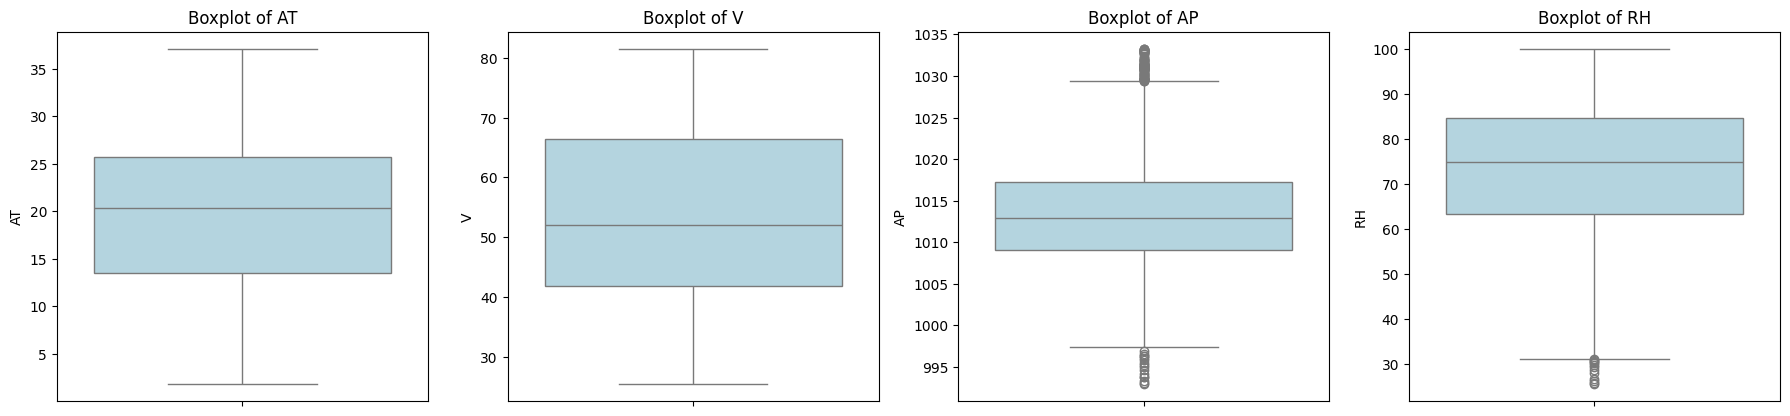

In [660]:
# Plot boxplots for multiple variables
plt.figure(figsize=(18, 12))  # Set the figure size
columns = ['AT','V','AP','RH'] # List of columns to plot

# Loop through the selected columns and create a boxplot for each
for i, col in enumerate(columns, 1): # 'enumerate' gives index (i) and column name (col)
    plt.subplot(3, 4, i) # Create subplots in a 3-row, 4-column grid (though only 4 plots are used)
    sns.boxplot(y=df_cleaned[col], color='lightblue') # Boxplot for each feature
    plt.title(f'Boxplot of {col}') # Set title for each subplot

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show() 

Boxplot Insights for Each Feature:
1. AT (Temperature): The median value is around 20°C. The data is reasonably symmetric, with a central box and whiskers extending from around 15°C to 25°C. 

2. V (Exhaust Vacuum): The median value is approximately around the 50cm Hg. The box is wider here, indicating more variation compared to AT.

3. AP (Ambient Pressure): The median value is around the 1010 and 1015 milibar range. The data seems to have a slight skew, with some outliers at the higher pressure range (around 1030 milibar) and some at the lower pressure range (around 995 milibar) The interquartile range is relatively tight, showing that most pressure readings fall between 1000 milibar and 1020 milibar.

4. RH (Relative Humidity): The median value is around 75%. A wider box indicates a moderate spread of humidity levels. RH also has a few outliers, particularly around 30%.

### 2.3 Separate Boxplot for 'AP' Feature

This code creates a separate boxplot specifically for the AP (Ambient Pressure) feature to allow a closer look at its distribution.

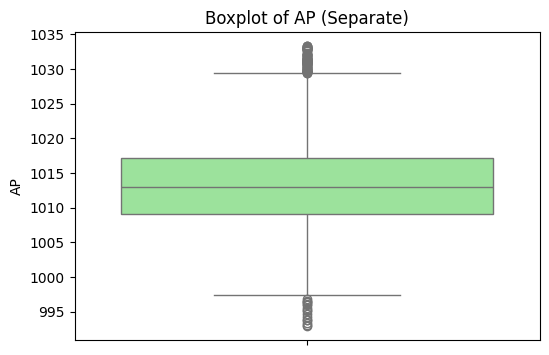

In [661]:
# Create a new figure for the separate boxplot
plt.figure(figsize=(6, 4))  # Set the figure size

# Generate a boxplot for the 'AP' feature
sns.boxplot(y=df_cleaned['AP'], color='lightgreen')

# Set the title for the plot
plt.title('Boxplot of AP (Separate)')

# Display the plot
plt.show()

### 2.4 Outlier Removal Using IQR Method

In [662]:
# Remove Outliers Using IQR Method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from selected columns
columns_to_clean = ['AT', 'V', 'AP', 'RH']  # Target columns for outlier removal
for column in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

print("\nShape after removing outliers:", df_cleaned.shape)

# Save the cleaned dataset
df_cleaned.to_csv("CCPP_cleaned.csv", index=False)
print("\nCleaned CSV file saved as 'CCPP_cleaned.csv'")


Shape after removing outliers: (9425, 5)

Cleaned CSV file saved as 'CCPP_cleaned.csv'


In [663]:
print(f"Rows before outlier and duplicate removal: {df.shape[0]}")
print(f"Rows after outlier and duplicate removal: {df_cleaned.shape[0]}")

Rows before outlier and duplicate removal: 47840
Rows after outlier and duplicate removal: 9425


Initially, the dataset contained 47840 rows of raw data. After removing duplicates, we were left with 9527 unique rows. However, as observed in the previous boxplots, some of these data points were outliers, which could potentially skew the analysis and impact the performance of predictive models.

To address this, we applied the Interquartile Range (IQR) method to remove outliers from the four key features: AT, V, AP and RH.

This process filtered out extreme values beyond 1.5 times the IQR from the lower and upper quartiles.

After outlier removal, the dataset now contains 9425 rows, meaning 102 extreme values were removed.

## 3.0 Exploratory Data Analysis (EDA)

### 3.1 Variable Identification

Target Variable (PE): In this dataset, PE (Net hourly electrical energy output) is the target variable, meaning it is the value we aim to predict using machine learning models.

Predictor Variables (AT, V, AP, RH): The remaining columns (all columns except PE) are the predictor variables, which serve as input features to help predict PE.

In [664]:
# Identify Target Variable & Predictors
target = 'PE'
predictors = df_cleaned.columns[df_cleaned.columns != target]

### 3.2 Univariate Analysis

The univariate analysis focuses on predictor variables (AT, V, AP, RH) and the target variable (PE).

In [665]:
# Computes summary statistics for all predictor variables
print("Summary Statistics for Predictors:")
df_cleaned.describe()

Summary Statistics for Predictors:


,AT,V,AP,RH,PE
count,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000
mean,19.731416,54.407761,1013.123717,73.339134,454.169391
std,7.418106,12.679051,5.698543,14.563927,16.997486
min,1.810000,25.360000,997.340000,30.990000,420.260000
25%,13.610000,41.760000,1009.060000,63.320000,439.690000
50%,20.510000,52.720000,1012.880000,75.010000,451.190000
75%,25.760000,66.540000,1017.090000,84.850000,468.090000
max,37.110000,81.560000,1029.360000,100.160000,495.760000


The code above generates key metrics such as count, mean, standard deviation, min, max, and quartiles for numerical columns.

It helps to understand distributions, detect skewness, and verify data quality after cleaning.

#### 3.2.1 Boxplots After Cleaning (Outlier Removal)

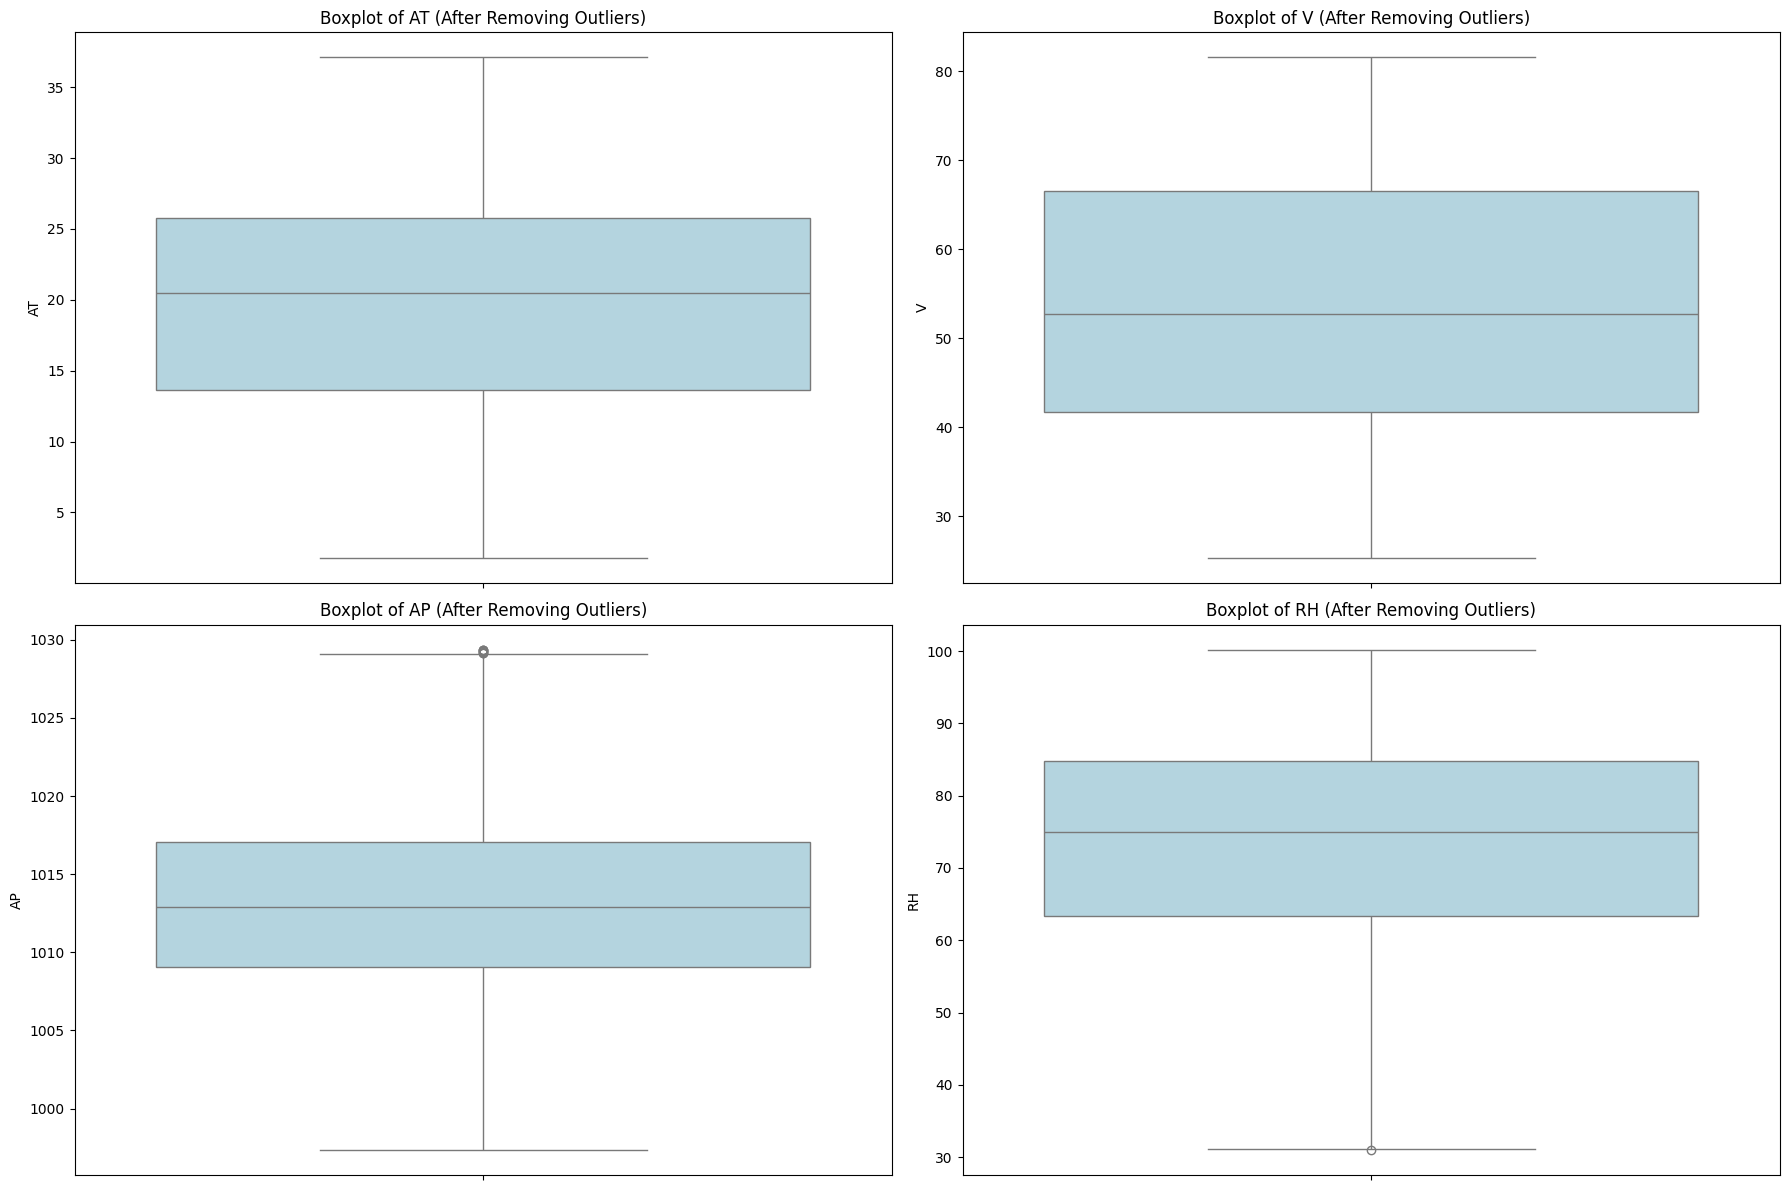

In [666]:
# Boxplots After Cleaning
plt.figure(figsize=(18, 12))  # Set figure size
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col], color='lightblue')
    plt.title(f'Boxplot of {col} (After Removing Outliers)')

plt.tight_layout()
plt.show()

Boxplot Insights for Each Feature After Cleaning (Outlier Removal):
1. AT (Temperature): The median is still centered around 20°C, and the interquartile range (IQR) remains between 15°C and 25°C.

2. V (Exhaust Vacuum): Similarly, the boxplot for V shows the median is around 55cm Hg, and the IQR appears to be between 40cm Hg and 70cm Hg.

3. AP (Ambient Pressure): For AP, the median is between 1015 and 1010 milibar, and the IQR is relatively narrow. Outliers, particularly at the higher end near 1030 milibar and 995 milibar, have been removed, resulting in a cleaner distribution.

4. RH (Relative Humidity): After outliers are removed, the RH boxplot has a tight distribution around the median of 75%. The IQR ranges from the 60% to the 85% percentile, and extreme values around the 30% percentile have been removed.

The removal of outliers has led to a clearer picture of the data's central tendency and spread. The boxplots now reflect the true variation within the dataset without being distorted by extreme values. Conclusively, these boxplots after outlier removal highlight a more stable and predictable distribution for each feature, making it easier to analyze the central tendencies and variability in the dataset.

#### 3.2.2 Histograms After Cleaning (Outlier Removal)

In each histogram, the blue bars represent the frequency of the data points within certain intervals (bins), and the overlaid curve is the Kernel Density Estimate (KDE), which smooths the data into a probability distribution. The red dashed vertical line indicates the mean of each variable.

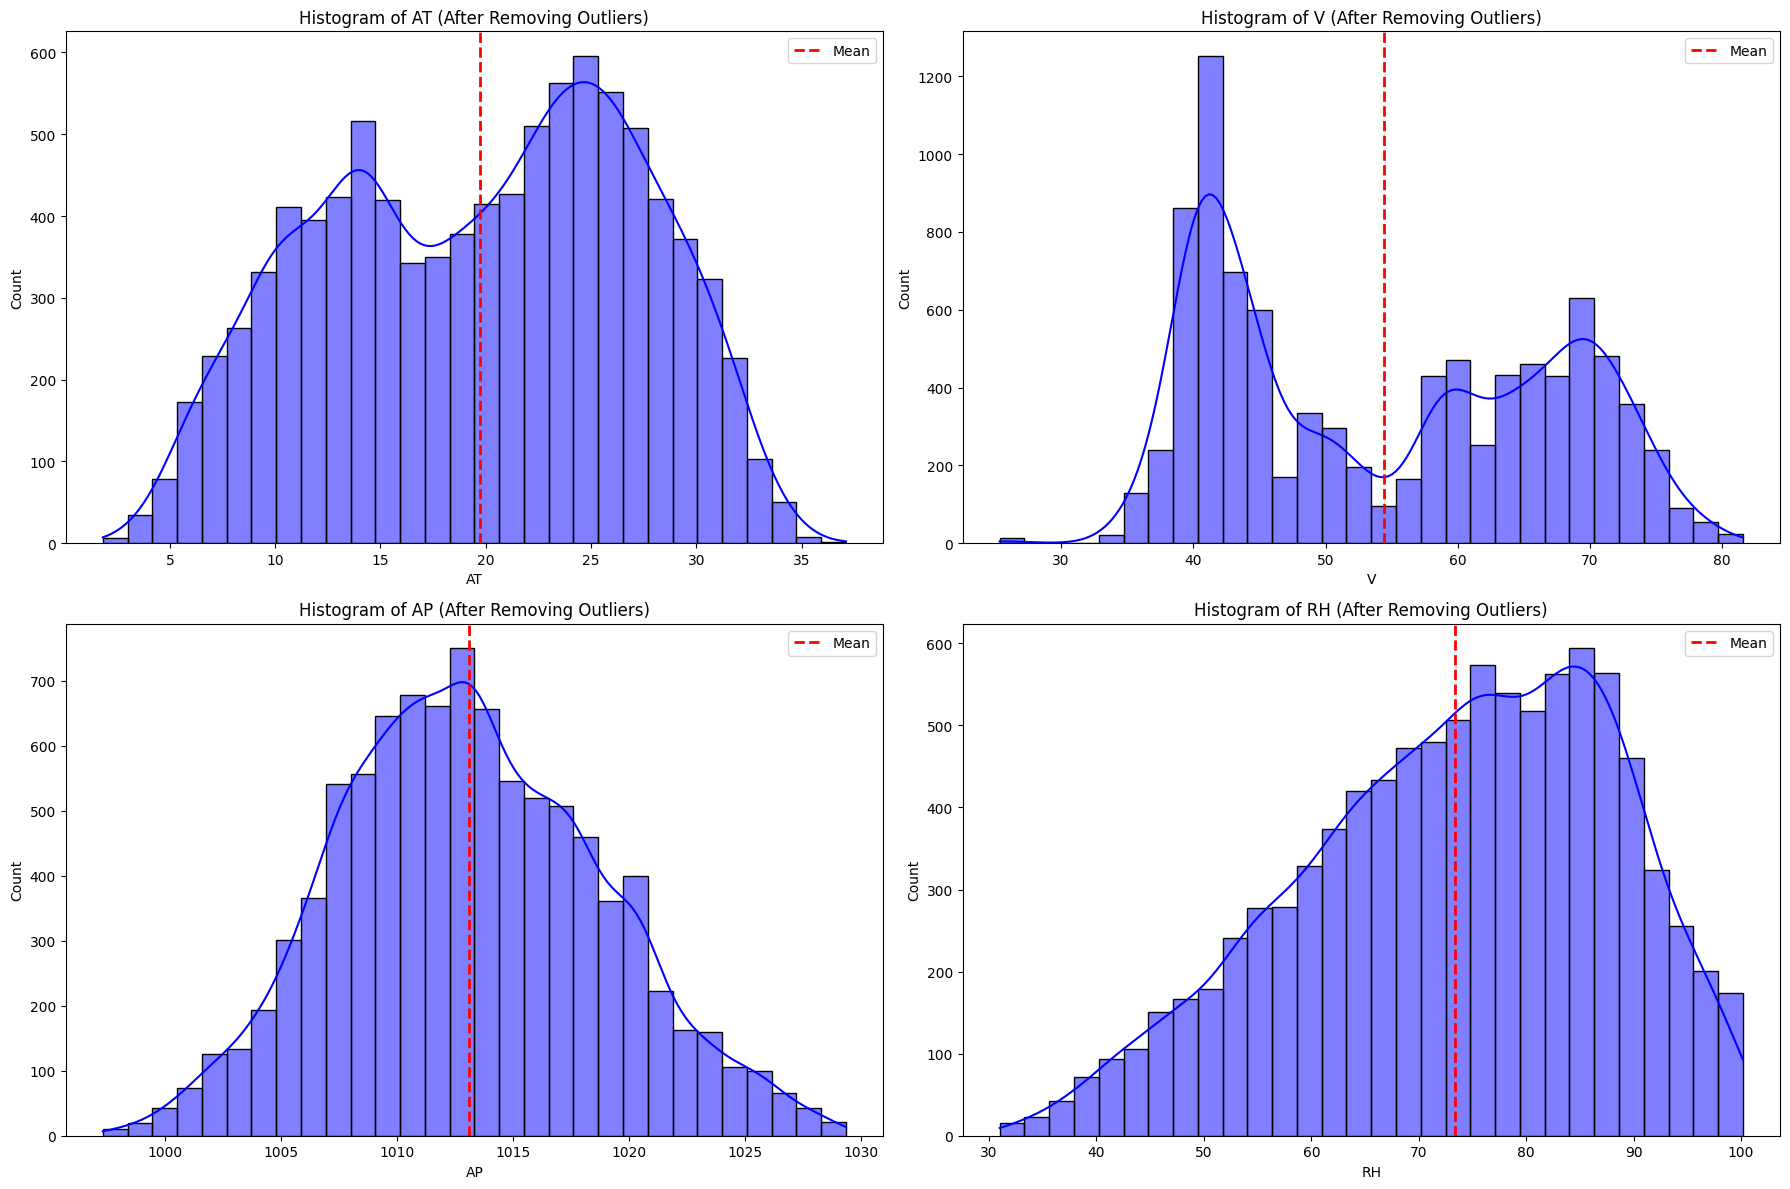

In [667]:
plt.figure(figsize=(18, 12))  # Set figure size

for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(2, 2, i)
    
    # Plot histogram with KDE
    sns.histplot(df_cleaned[col], bins=30, kde=True, color='blue')
    
    # Compute mean
    mean_value = df_cleaned[col].mean()
    
    # Add a dotted vertical line at the mean
    plt.axvline(mean_value, linestyle="dashed", color="red", linewidth=2, label="Mean")

    # Add title and legend
    plt.title(f'Histogram of {col} (After Removing Outliers)')
    plt.legend()

plt.tight_layout()
plt.show()

Histogram Insights for Each Feature After Cleaning (Outlier Removal):

1. AT (Temperature): The histogram for AT shows a bimodal distribution, meaning there are two distinct peaks in the data. One peak appears around 15°C, and the other appears closer to 25°C. The mean (red dashed line) is located near 20°C, indicating that the average temperature is close to the center of the distribution.

2. V (Exhaust Vacuum): The histogram for V shows a right-skewed distribution, where the majority of the data is concentrated on the lower end (around 60-70cm Hg) but with a long tail extending toward higher values (up to 40cm Hg). The mean is near the midpoint of the distribution, which is slightly higher than the median due to the right-skewness.


3. AP (Ambient Pressure): The AP histogram exhibits a normal distribution with a single peak around 1010-1015 millibar, indicating that most of the pressure values are clustered in this range. The mean is located near the center of the distribution, which aligns with the peak of the histogram. After outlier removal, the distribution looks symmetrical, resulting in a more typical, bell-shaped distribution.

4. RH (Relative Humidity): The RH histogram has most data points concentrated between 75% and 90% humidity. The mean is located around 70%, indicating that the average humidity falls near the center of the data, but the long tail on the right indicates that there are a few higher humidity values.

After outlier removal, the distributions for all variables are much cleaner and focused on their central tendency, as shown by the histograms.

#### 3.2.3 Distribution of Target Variable 'PE'

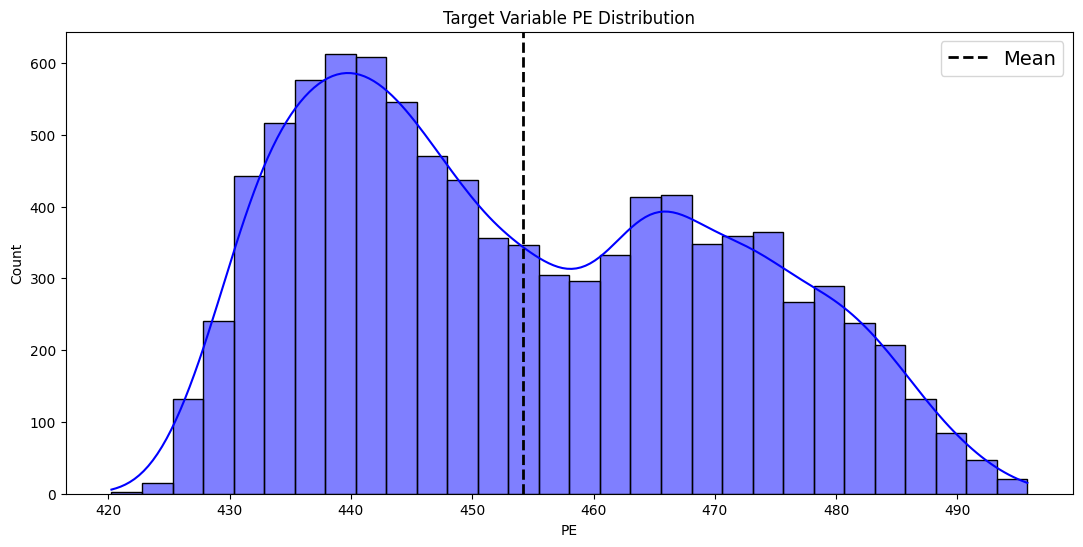

In [668]:
plt.figure(figsize=(13,6))

# Plot distribution of PE
sns.histplot(df_cleaned["PE"], color="b", kde=True, bins=30, edgecolor="black")

# Add a vertical dashed line for the mean
plt.axvline(df_cleaned["PE"].mean(), linestyle="dashed", color="k", label='Mean', linewidth=2)

# Add legend and title
plt.legend(loc="best", prop={"size":14})
plt.title("Target Variable PE Distribution")

# Show the plot
plt.show()

The distribution of the target variable 'PE' appears symmetric, with a slight skew toward higher PE values on the right.

### 3.3 Study Summary Statistics for the Dataset

In [669]:
# Summary statistics for the dataset
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9425.0,19.731416,7.418106,1.81,13.61,20.51,25.76,37.11
V,9425.0,54.407761,12.679051,25.36,41.76,52.72,66.54,81.56
AP,9425.0,1013.123717,5.698543,997.34,1009.06,1012.88,1017.09,1029.36
RH,9425.0,73.339134,14.563927,30.99,63.32,75.01,84.85,100.16
PE,9425.0,454.169391,16.997486,420.26,439.69,451.19,468.09,495.76


The above output prints the important summary statistics of all the numeric variables such as count, mean, std, min, 25%, 50%, 75%, max.

### 3.4 Multivariate Analysis

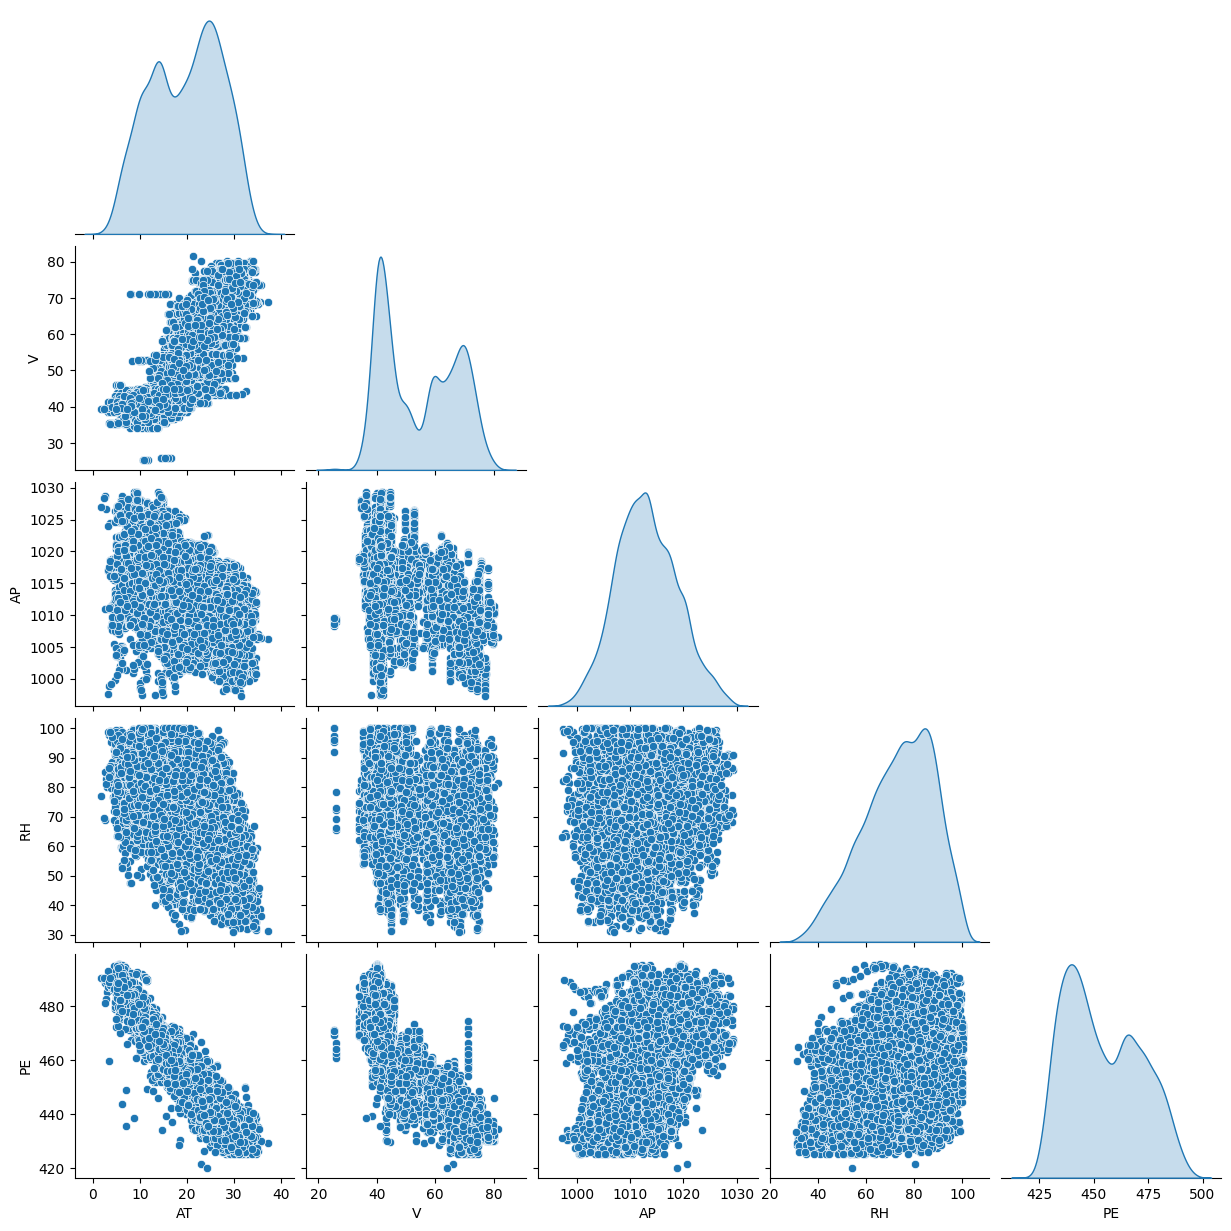

In [670]:
# Create pairplot with KDE on diagonals and only lower triangle
sns.pairplot(df_cleaned, diag_kind='kde', corner=True)  

**Diagonal Analysis:**

In the diagonal KDE plots, we observe that the features exhibit unimodal distributions, meaning that they follow a single peak pattern. However, V and AT have a slight bimodal distribution. This indicates that there might be two clusters or different operating conditions that influence the values of these variables. This suggests that the data could potentially be divided into subgroups with distinct characteristics.

The range of clusters in this dataset appears to be between 2 to 4 clusters, based on the dual peaks observed in some of the distributions.

This diagonal analysis aligns with univariate analysis and reveals important insights about the individual characteristics of each variable.


**Off-Diagonal Analysis: Relationships between Independent Attributes**

1. AT vs V: There is a moderate positive relationship, with a increase trend in exhaust vacuum as ambient temperature rises.

2. AT vs AP: The plot shows a weak negative correlation, with scattered points indicating no clear pattern.

3. AT vs RH: There seems to be a weak negative correlation, but the data points are spread out widely.

4. V vs AP: There is a weak negative correlation between these feaures, with points spread out.

5. V vs RH: There is a weak negative correlation between these feaures, with points spread out.

6. AP vs RH: There seems to be little to no correlation, with scattered data points suggesting that these variables don't strongly influence each other.
  
  
**Strength Attribute: Relationship between Dependent (PE/Power Output) and Independent Attributes**

1. PE vs AT (Temperature): A strong negative linear relationship is observed, suggesting that a power output decreases as temperature increases.

2. PE vs V (Exhaust Vacuum): A negative linear relationship is observed, suggesting that power output decreases as exhaust vacuum increases.

3. PE vs AP (Ambient Pressure): The relationship is weak, with a slight positive trend but no clear pattern.

4. PE vs RH (Relative Humidity): The relationship is weak. There seems to be little to no correlation, with scattered data points suggesting that these variables don't strongly influence each other.


**Conclusion:**
In this dataset, the most significant predictors for PE (Power Output) appear to be AT (Ambient Temperature) and V (Exhaust Vacuum) as these features exhibit the clearest and strongest relationships with the target variable. Conversely, AP (Ambient Pressure) and RH (Relative Humidity) has a weaker relationship with PE and may not be as critical for predicting power output.

Additionally, the pairplot highlights the presence of potential clusters, especially due to the bimodal distributions in some variables. This suggests that further analysis, such as clustering or segmentation, may be valuable for better understanding the underlying data structure.

Finally, based on correlation analysis, **AT** and **V** could be strong predictors, while **AP** and **RH** might be less impactful and could potentially be removed or combined with other variables to reduce redundancy.

### 3.5 Study Correlation

In [671]:
# Check the Correlation
df_cleaned.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.842391,-0.509854,-0.543941,-0.947285
V,0.842391,1.000000,-0.418237,-0.310655,-0.868883
AP,-0.509854,-0.418237,1.000000,0.108469,0.521804
RH,-0.543941,-0.310655,0.108469,1.000000,0.389835
PE,-0.947285,-0.868883,0.521804,0.389835,1.000000


Pairplot for checking the Correlation

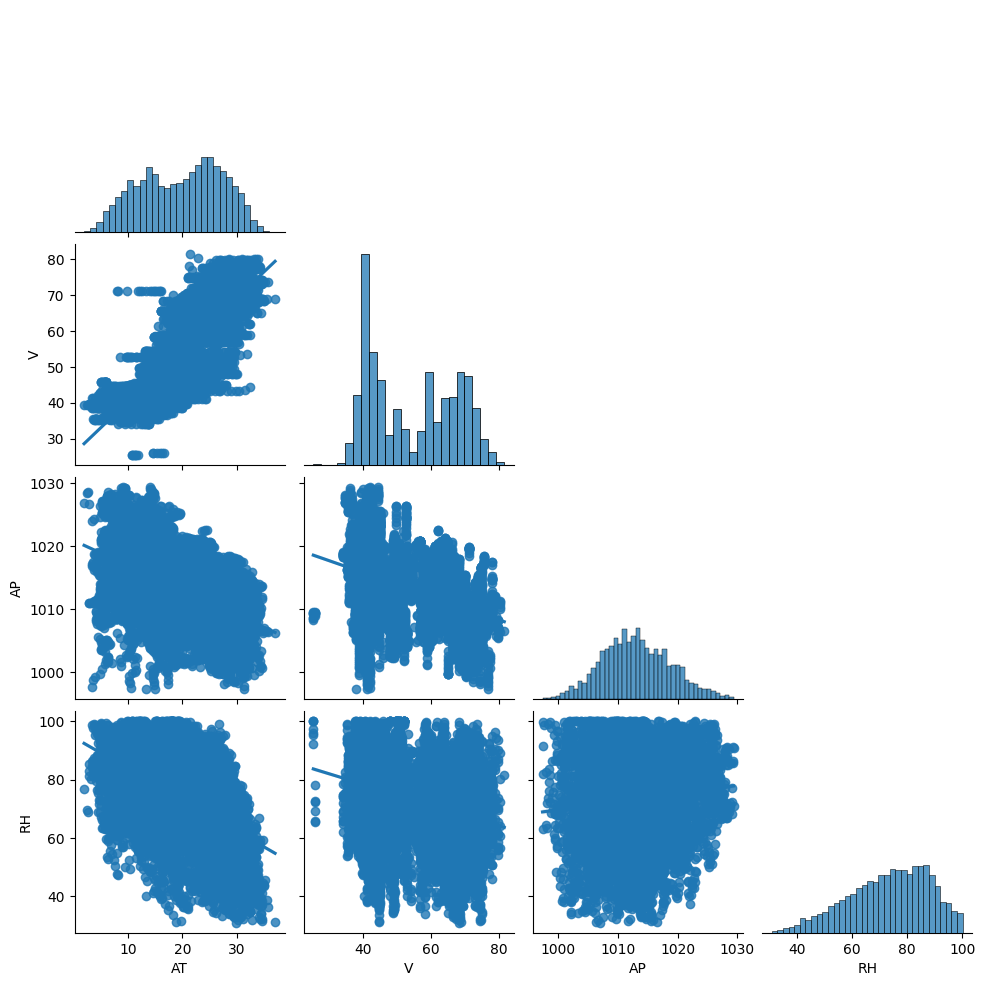

In [672]:
# Pairplot for checking the Correlation
sns.pairplot(df_cleaned[['AT', 'V', 'AP', 'RH']], kind = 'reg', corner = True);

Heatmap for checking the Correlation

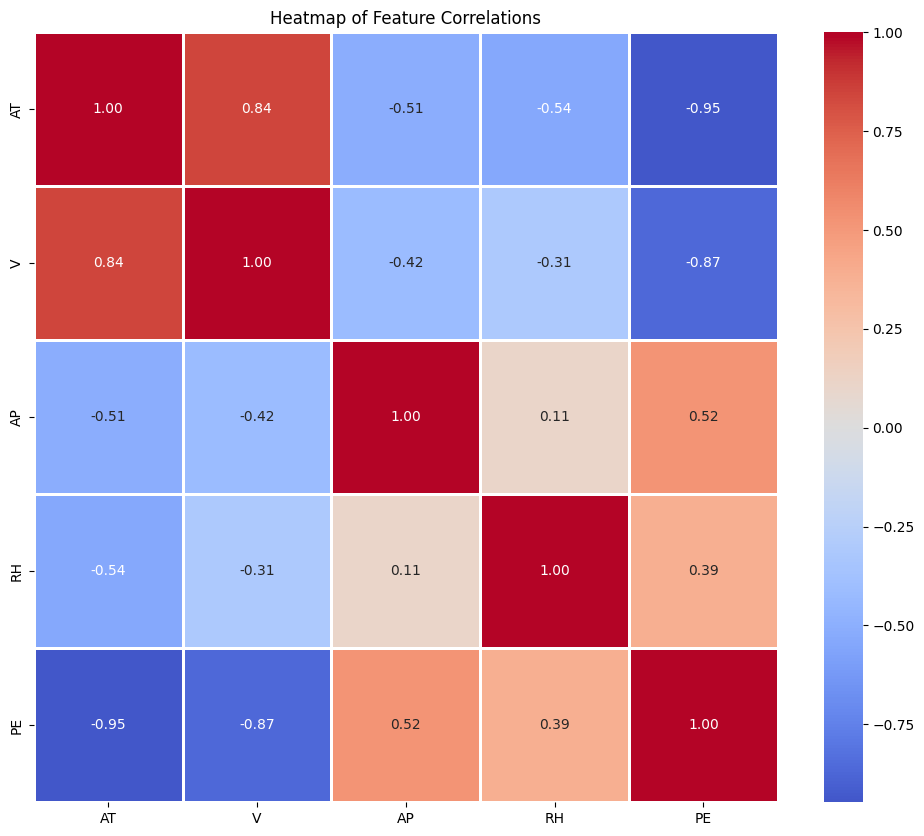

In [ ]:
# Compute absolute correlation matrix
corr = df_cleaned.corr()

# Plot the heatmap without masking
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0, 
            xticklabels=corr.index, yticklabels=corr.columns, 
            cbar=True, linewidths=1, fmt=".2f")

plt.title("Heatmap of Feature Correlations")
plt.show()

**Observations from the Heatmap:**

AT and V: A strong positive correlation of 0.84, indicating that as the temperature increases, the voltage also tends to increase.

AT and AP: A negative correlation of -0.51, meaning as the temperature increases, pressure decreases.

AT and RH: A negative correlation of -0.54, suggesting that higher temperatures tend to coincide with lower humidity levels.

AT and PE : A very strong negative correlation of -0.95, indicating that as the temperature increases, energy output significantly decreases.

V and AP: A moderate negative correlation of -0.42, meaning that as voltage increases, pressure tends to decrease.

V and RH: A weak negative correlation of -0.31, showing that voltage is slightly inversely related to relative humidity.

V and PE: A strong negative correlation of -0.87, meaning that as voltage increases, energy output tends to decrease significantly.

AP and RH: A very weak positive correlation of 0.11, indicating minimal relationship between pressure and humidity.

AP and PE: A moderate positive correlation of 0.52, suggesting that as pressure increases, energy output tends to increase as well.

RH and PE: A moderate positive correlation of 0.39, indicating that as relative humidity increases, energy output also tends to increase.

**Key Takeways:**

Temperature (AT) is the most critical factor affecting energy output—higher temperatures severely reduce PE.

Voltage (V) also negatively impacts PE, so monitoring V and AT together is crucial.

Ambient Pressure (AP) tends to improve PE, but its effect is not as strong as temperature's negative impact.

Relative Humidity (RH) has some influence on PE, but its effect is relatively weaker compared to AT and V.

### 3.6 EDA (Exploratory Data Analysis) Summary

**1. Univariate Analysis** 
- **AT (Temperature):** Bimodal distribution with peaks around 15°C and 25°C.  
- **V (Exhaust Vacuum):** Right-skewed distribution, mostly between 40cm Hg.  
- **AP (Ambient Pressure):** Normally distributed around 1010-1015 millibar.  
- **RH (Relative Humidity):** Skewed mostly between 75% and 90%.  
- **Outlier Removal:** Led to cleaner distributions, reducing skewness and improving analysis clarity.  

**2. Bivariate Analysis (Feature Relationships)**
- **AT vs PE:** Strong negative correlation (-0.95), indicating higher temperatures reduce power output.  
- **V vs PE:** Strong negative correlation (-0.87), meaning higher exhaust vacuum lowers power output.  
- **AP vs PE:** Moderate positive correlation (0.52), suggesting higher ambient pressure slightly increases power output.  
- **RH vs PE:** Weak positive correlation (0.39), showing a minor impact of humidity on power output.  
- **AT vs V:** Strong positive correlation (0.84), showing these features move together.  
- **AT vs AP & AT vs RH:** Moderate negative correlations (-0.51 and -0.54, respectively).  

**3. Pairplot & Heatmap Insights**  
- **Clusters:** Bimodal distributions in some features indicate 2-4 potential clusters in the data.  
- **Strongest Predictors of PE:** **AT (Temperature) and V (Exhaust Vacuum)** have the most significant impact on power output.  
- **Lesser Predictors:** **AP (Pressure) and RH (Humidity)** have weaker relationships with PE.  

**4. Key Takeaways**  
- **Higher Temperature (AT) -> Lower Power Output (PE).**  
- **Higher Exhaust Vacuum (V) -> Lower Power Output (PE).**  
- **Higher Ambient Pressure (AP) -> Slightly Higher Power Output (PE).**  
- **Relative Humidity (RH) has minimal impact on PE.**  
- **Feature Selection:** AT and V should be prioritized as predictors, while AP and RH might be less crucial.

## 4.0 Encoding into Categories

The process involves transforming the continuous numerical variable PE into discrete categories based on its range. First, the minimum and maximum values of PE are calculated, and the range is divided into 5 equal intervals. A classification function is then defined to categorize PE values into five labels: Very Low, Low, Moderate, Strong, and Very Strong, depending on which interval the value falls into. This function is applied to the PE column, creating a new column, PE_class, with the corresponding categories.

In [ ]:
# Load dataset
df_cleaned = pd.read_csv('CCPP_cleaned.csv')

# Determine the dynamic range of PE
a = df_cleaned['PE'].min()
b = df_cleaned['PE'].max()
interval = (b - a) / 5  # Divide the range into 5 equal bins

# Define the function to classify PE dynamically
def classify_pe(value):
    if value < a + interval:
        return 1  # Very Low
    elif value < a + 2 * interval:
        return 2  # Low
    elif value < a + 3 * interval:
        return 3  # Moderate
    elif value < a + 4 * interval:
        return 4  # Strong
    else:
        return 5  # Very Strong

# Apply the classification
df_cleaned['PE_class'] = df_cleaned['PE'].apply(classify_pe)

# Save the modified DataFrame (override the existing CCPP_cleaned)
df_cleaned.to_csv('CCPP_cleaned.csv', index=False)

In [679]:
# Display first few rows
df_cleaned.head()

,AT,V,AP,RH,PE,PE_class
0,14.96,41.76,1024.07,73.17,463.26,3
1,25.18,62.96,1020.04,59.08,444.37,2
2,5.11,39.40,1012.16,92.14,488.56,5
3,20.86,57.32,1010.24,76.64,446.48,2
4,10.82,37.50,1009.23,96.62,473.90,4


### 4.1 Plot Bar Distribution After Defining Class Labels

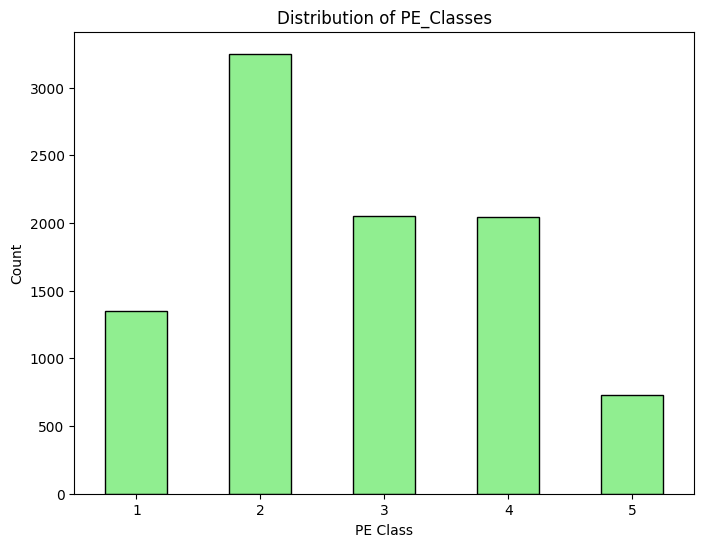

In [680]:
# Plot bar distribution
plt.figure(figsize=(8, 6))
df_cleaned['PE_class'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('PE Class')
plt.ylabel('Count')
plt.title('Distribution of PE_Classes')
plt.xticks(rotation=0)
plt.show()

Bar Chart Analysis:
- PE Class 1: This class has the smallest count, with just over 1,000 instances.
- PE Class 2: This class has the highest count by far, with over 3,000 instances. It stands out as the most common class.
- PE Class 3: This class has a moderate count, slightly above 2,000.
- PE Class 4: This class also has a moderate count, similar to Class 3.
- PE Class 5: This class has the lowest count after Class 1, with just over 500 instances.

The chart shows that the data is imbalanced, meaning certain classes (especially Class 2) have significantly more instances than others. This imbalance can cause problems in machine learning models, as they may be biased toward the more frequent classes and fail to properly predict the less frequent ones.

Therefore, one way to address it is through downsampling the overrepresented classes (example, Class 2). The code below uses Random Under-Sampling from the imblearn library, which reduces the number of samples from the majority classes to make the dataset more balanced.

### 4.2 Random Under-Sampling for Imbalanced Dataset

In [681]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load the dataset
df_cleaned = pd.read_csv('CCPP_cleaned.csv')

# Separate features and target variable
X = df_cleaned.drop(columns=['PE_class'])  # Features
y = df_cleaned['PE_class']  # Target

# Check class distribution before downsampling
print("Before Downsampling:", Counter(y))

# Apply Random Under-Sampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert back to DataFrame
df_downsampled = pd.DataFrame(X_resampled, columns=X.columns)
df_downsampled['PE_class'] = y_resampled

# Save downsampled dataset
df_downsampled.to_csv('CCPP_converted.csv', index=False)

# Check class distribution after downsampling
print("After Downsampling:", Counter(y_resampled))

Before Downsampling: Counter({2: 3251, 3: 2052, 4: 2044, 1: 1348, 5: 730})
After Downsampling: Counter({1: 730, 2: 730, 3: 730, 4: 730, 5: 730})


In [682]:
df_cleaned.head()

,AT,V,AP,RH,PE,PE_class
0,14.96,41.76,1024.07,73.17,463.26,3
1,25.18,62.96,1020.04,59.08,444.37,2
2,5.11,39.40,1012.16,92.14,488.56,5
3,20.86,57.32,1010.24,76.64,446.48,2
4,10.82,37.50,1009.23,96.62,473.90,4


### 4.3 Plot Bar Distribution After Balancing and Conducting Under Sampling

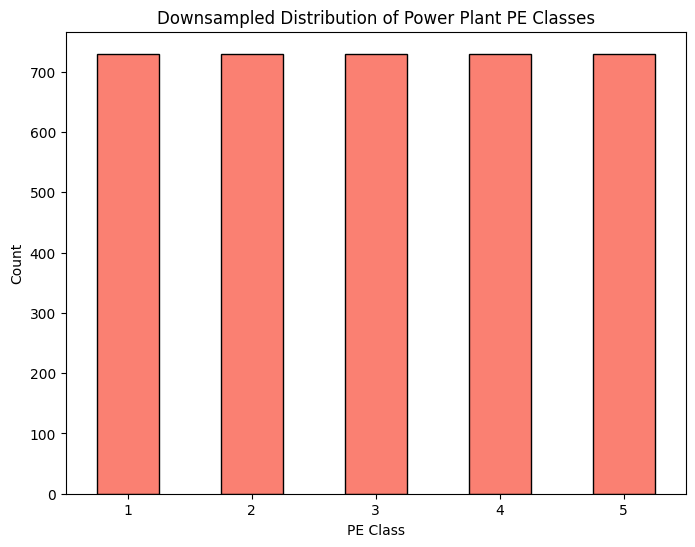

In [683]:
# Plot new distribution
plt.figure(figsize=(8, 6))
df_downsampled['PE_class'].value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('PE Class')
plt.ylabel('Count')
plt.title('Downsampled Distribution of Power Plant PE Classes')
plt.xticks(rotation=0)
plt.show()

## 5.0 Feature Engineering

PE    0.978968
AP    0.527194
RH    0.426427
V    -0.877813
AT   -0.943054
Name: PE_class, dtype: float64


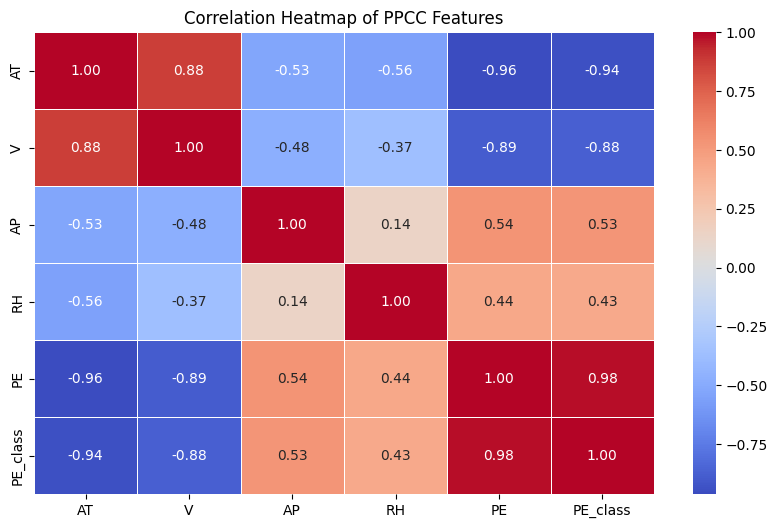

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('CCPP_converted.csv')

# Compute Pearson correlation matrix
correlation_matrix = df.corr()

# Extract correlation values of features with 'PE_class'
correlation_with_PE = correlation_matrix["PE_class"].drop("PE_class")

# **Sort correlation values to see the most important features**
sorted_correlation = correlation_with_PE.sort_values(ascending=False)
print(sorted_correlation)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of PPCC Features")
plt.show()

### 5.1 Normalizing Numerical Features using MinMaxScaler

Normalize the values of AT, V, AP, and RH, and save the normalized data into 'CCPP_normalized.csv'.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('CCPP_converted.csv')

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
features_to_normalize = ['AT', 'V', 'AP', 'RH']  # Assuming these are the input features in PPCC
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Save normalized dataset
df_normalized.to_csv('CCPP_normalized.csv', index=False)

### 5.2 Creating Composite Features Using Covariance

Based on the insights of the correlation heatmap, here are 4 composite features that are created by combining AT, V, AP and RH:

1. Temperature-Exhaust Vacuum Interaction (AT_V): Since there is a strong negative correlation between AT (Temperature) and V (Exhaust Vacuum), combining these two features can capture their joint impact on power output. A higher temperature generally reduces power output, and so does a higher exhaust vacuum. This interaction might be useful in modeling.

2. Temperature-Ambient Pressure Interaction (AT_AP): The negative correlation between AT (Temperature) and AP (Ambient Pressure) suggests that both of these features might have a joint effect on power output. A lower temperature could correlate with higher ambient pressure, which slightly increases power output.

3. Exhaust Vacuum-Relative Humidity Interaction (V_RH): The relationship between V (Exhaust Vacuum) and RH (Relative Humidity) could capture some unique patterns, especially since V has a strong negative correlation with power output, while RH has a weaker influence. Combining them might reveal interactions that influence power output.

4. Temperature-Relative Humidity Interaction (AT_RH): Although AT and RH have a moderate negative correlation, their interaction could provide additional insight into how temperature and humidity together influence power output, especially given that RH is right-skewed.

Save the composite features into 'CCPP_features.csv'.

In [19]:
# Create composite features using interaction (multiplication)
df_composite = df_normalized.copy()

# Compute interaction features (element-wise multiplication)
df_composite['AT_V'] = df_normalized['AT'] * df_normalized['V']
df_composite['AT_AP'] = df_normalized['AT'] * df_normalized['AP']
df_composite['V_RH'] = df_normalized['V'] * df_normalized['RH']
df_composite['AT_RH'] = df_normalized['AT'] * df_normalized['RH']

# Save final feature-engineered dataset
df_composite.to_csv('CCPP_features.csv', index=False)

### 5.3 Select Only the Required Features Based on Correlation Analysis

Based on the correlation heatmap, the first observation in EDA shows that 'AT' and 'V' have the strongest relationship with 'PE', with correlation values of -0.96 and -0.89, respectively. Since these values have the highest absolute magnitude, they indicate the most significant impact on power output, even though the relationships are negative. In contrast, 'AP' and 'RH' have weaker positive correlations of 0.54 and 0.44, meaning their influence on 'PE' is comparatively lower.

Therefore, we will retain 'AT' and 'V' along with the four composite features and drop other features such as 'AP' and 'RH' from CCPP_features.csv. The new dataset will be saved as 'selected_feature_CCPP.csv'. This selection ensures that we prioritize the features with the most predictive power, regardless of whether the relationship is positive or negative.

In [20]:
# Load the feature-engineered dataset
df = pd.read_csv('CCPP_features.csv')

selected_features = [
    'AT', 'V',  # Selected numerical & categorical features
    'AT_V', 'AT_AP', 'V_RH', 'AT_RH', 'PE_class'  # Composite features
]

df_selected = df[selected_features]
df_selected.to_csv('selected_feature_CCPP.csv', index=False)

### 5.4 Create Dataset with Only Selected Strongest Features Without Normalization

The code below selects the features 'AT' and 'V' from the original dataset and saves the new dataset as selected_converted_CCPP.csv for the best correlation with PE_class.

In [12]:
df_original = pd.read_csv('CCPP_converted.csv')
df_selected_converted = df_original[['AT', 'V', 'PE_class']]
df_selected_converted.to_csv('selected_converted_CCPP.csv', index=False)

## 6.0 Model Deployment

1) CCPP_converted.csv (all features without normalization and without composite features)
2) CCPP_normalized.csv (all features with normalization and without composite features)
3) CCPP_features.csv (all features with normalization and containing composite features)
4) selected_feature_CCPP.csv (selected features with normalization)
5) selected_converted_CCPP.csv (selected feature without normalization 'AT' and 'V')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# List to store evaluation results
results = []

def train_decision_tree(file_path, feature_cols, model_name):
    """Loads dataset, trains a Decision Tree classifier, and returns evaluation metrics"""
    df = pd.read_csv(file_path)
    
    # Define the feature matrix (X) and target variable (y)
    X = df[feature_cols]
    y = df['PE_class']

    # Split the data into training and testing sets (30% test data, 70% train data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Initialize the DecisionTreeClassifier model
    clf = DecisionTreeClassifier()

    # Train the model using the training data
    clf.fit(X_train, y_train)

    # Predict using the test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics for multiclass classification
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')  # Change average to 'weighted'
    recall = metrics.recall_score(y_test, y_pred, average='weighted')  # Change average to 'weighted'
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')  # Change average to 'weighted'

    # Store the results
    results.append({
        'Model': model_name,
        'Dataset': file,
        'Accuracy': round(accuracy * 100, 2),
        'Precision': round(precision * 100, 2),
        'Recall': round(recall * 100, 2),
        'F1-Score': round(f1 * 100, 2)
    })

# Define feature columns for each dataset along with model names
features_dict = {
    "CCPP_converted.csv": (['AT', 'V', 'AP', 'RH'], "Model 1"),
    "CCPP_normalized.csv": (['AT', 'V', 'AP', 'RH'], "Model 2"),
    "CCPP_features.csv": (['AT', 'V', 'AP', 'RH', 'AT_V', 'AT_AP', 'V_RH', 'AT_RH'], "Model 3"),
    "selected_feature_CCPP.csv": (['AT', 'V', 'AT_V', 'AT_AP', 'V_RH', 'AT_RH'], "Model 4"),
    "selected_converted_CCPP.csv": (['AT', 'V'], "Model 5"),
}

# Loop through each file and train a decision tree model
for file, (features, model_name) in features_dict.items():
    train_decision_tree(file, features, model_name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

# Optionally, you can save the results to a CSV file
results_df.to_csv('model_performance_results.csv', index=False)

     Model                      Dataset  Accuracy  Precision  Recall  F1-Score
0  Model 1           CCPP_converted.csv     75.07      75.25   75.07     75.12
1  Model 2          CCPP_normalized.csv     75.62      75.66   75.62     75.61
2  Model 3            CCPP_features.csv     75.25      75.85   75.25     75.44
3  Model 4    selected_feature_CCPP.csv     75.80      75.81   75.80     75.79
4  Model 5  selected_converted_CCPP.csv     74.34      74.49   74.34     74.37


## 7.0 Summarization of Observation in the Comparison Table

From the comparison table, we can observe that Model 4 (selected_feature_CCPP.csv) achieved the highest accuracy (75.80%), along with high precision, recall, and F1-score, making it the best-performing model overall. This suggests that selecting only the most relevant features improves model performance by reducing noise and focusing on the strongest predictors.

On the other hand, Model 5 (selected_converted_CCPP.csv) has the lowest accuracy (74.34%) and the weakest precision, recall, and F1-score. This indicates that removing important features or not utilizing additional engineered features may negatively impact predictive performance, making it the worst-performing model in this comparison.

Overall, feature selection and engineering play a crucial role in optimizing model performance, as seen in Model 4, which benefits from a refined feature set. This improvement is achieved because we used all the composite features, ensuring important relationships are captured between variables. Additionally, we selected the best features, 'AT' and 'V', which have the strongest correlation with the target variable 'PE', allowing the model to focus on the most impactful predictors. This approach not only enhances predictive accuracy but also ensures diversity in feature representation, leading to a more robust and generalizable model.